## Neural Tracking Matrices

Neural tracking matrices are a tabular representation used to record the activity of neurons in a neuronal system. These matrices are constructed from records of electrical or chemical activity of a set of neurons over a period of time.

The neural tracking matrix has dimensions N x T, where N represents the number of neurons and T represents the number of time points at which measurements were taken. Each entry in the matrix indicates whether a particular neuron has fired an action potential at a given time point. If a neuron has fired, a 1 is placed in the corresponding cell; otherwise, a 0 is placed.

Neural tracking matrices are useful for capturing and analyzing patterns of activity in the neuronal system. By observing the rows of the matrix, the trace of activity of a specific neuron over time can be followed. Additionally, by analyzing patterns of simultaneous activation of multiple neurons, correlations and functional relationships between them can be identified.

It is important to note that neural tracking matrices are a simplified representation of neuronal activity and do not capture all the details and complexities of neuronal dynamics. However, they are a valuable tool for analyzing and understanding the general patterns and behaviors of the neuronal system.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load('raster.npy')

In [21]:
# Acquisition rate
pps = 4 

# Read the file
raster = np.load("raster.npy").T

# Remove neurons with no activity (if any)
raster = np.delete(raster, np.where(np.sum(raster, axis=1) == 0)[0], axis=0).copy()


In [22]:
raster.shape

(104, 2159)

In [23]:
def plot_raster(raster, pps, markersize=5, activity_color='blue', coactivity_color='red'):
    N, T = raster.shape
    plt.figure(figsize=(12, 6))

    ax = plt.axes((0.05, 0.35, 0.75, 0.6))
    indices = np.where(raster == 1)
    plt.plot(indices[1], indices[0] + 1,
            marker='|', linestyle='None',
            markersize=markersize, color='black')
    ax.set_xlim(0, T-1)
    ax.set_ylim(1, N)
    plt.xticks([])
    plt.ylabel("Neuron Label")

    ax = plt.axes(((0.05, 0.12, 0.75, 0.2)))
    coactivity = np.sum(raster, axis=0)
    ppm = pps * 60
    time = np.arange(0, T) / ppm
    plt.plot(time, coactivity, linewidth=0.5, color=coactivity_color)
    ax.set_xlim(np.min(time), np.max(time))
    ax.set_ylim(0, np.max(coactivity) + 1)
    plt.xlabel("Time (min)")
    plt.ylabel("Coactivity")

    ax = plt.axes((0.85, 0.35, 0.1, 0.6))
    activity = np.sum(raster, axis=1)
    plt.plot(activity, np.arange(1, N+1), color=activity_color, linewidth=1)
    ax.set_xlim(0, max(activity) + 1)
    ax.set_ylim(1, N)
    plt.xlabel("Activity")
    plt.yticks([])

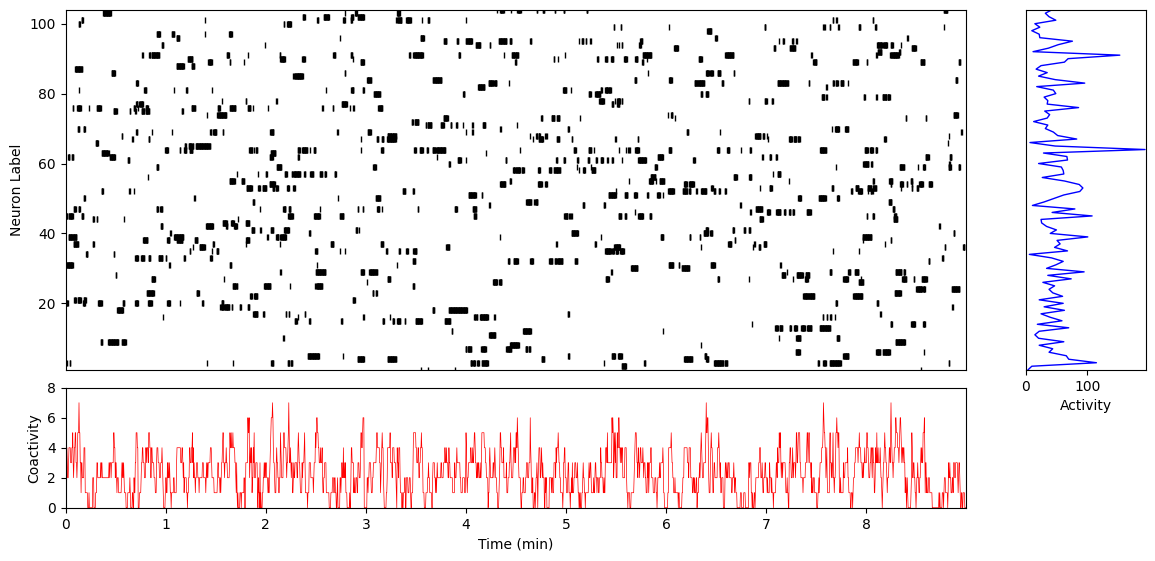

In [24]:
plot_raster(raster,pps)

## Surrogate Rasters

The process of generating surrogate rasters is a technique used in neuroscience research to assess the statistical significance of observed neuronal activity. It involves creating a surrogate or rearranged version of a given real raster while preserving some properties of the original data.

The main goal of generating surrogate rasters is to establish a null hypothesis for comparison. By randomly permuting activity patterns in the real raster while keeping other features intact, we can determine if the observed activity is significantly different from what would be expected by chance.

The procedure for generating surrogate rasters generally follows these steps:

1. Input: We start with a real raster of neuronal activity. This raster consists of binary values (0 or 1) representing the presence or absence of neuronal activity at different time points for each neuron.

2. Permutation: We randomly permute activity within each neuron row independently. This reordering disrupts temporal relationships between neurons but preserves the overall statistics of the raster.

3. Output: We obtain the surrogate raster, which serves as a null model for comparison with the real raster.

Applications of surrogate rasters include:

1. Hypothesis testing: By comparing the statistical properties of the real raster with those of surrogate rasters, researchers can assess whether observed neuronal activity patterns are statistically significant or can be explained by chance.

2. Evaluation of network dynamics: Surrogate rasters can help determine whether observed network dynamics, such as synchronization or desynchronization, result from genuine interactions between neurons or are the product of random fluctuations.

3. Validation of analytical methods: Surrogate rasters are a valuable tool for testing and validating analysis techniques and algorithms designed to extract meaningful information from neuronal activity data.

Surrogate rasters play a crucial role in understanding the statistical properties and significance of neuronal activity, helping researchers gain insights into the underlying dynamics of neuronal networks.

In [25]:
def surrogate_raster(real_raster):
    N, T = real_raster.shape
    surrogate_raster = np.zeros((N, T))
    surrogate_raster = np.apply_along_axis(np.random.permutation, axis=1, arr=real_raster)
    return surrogate_raster


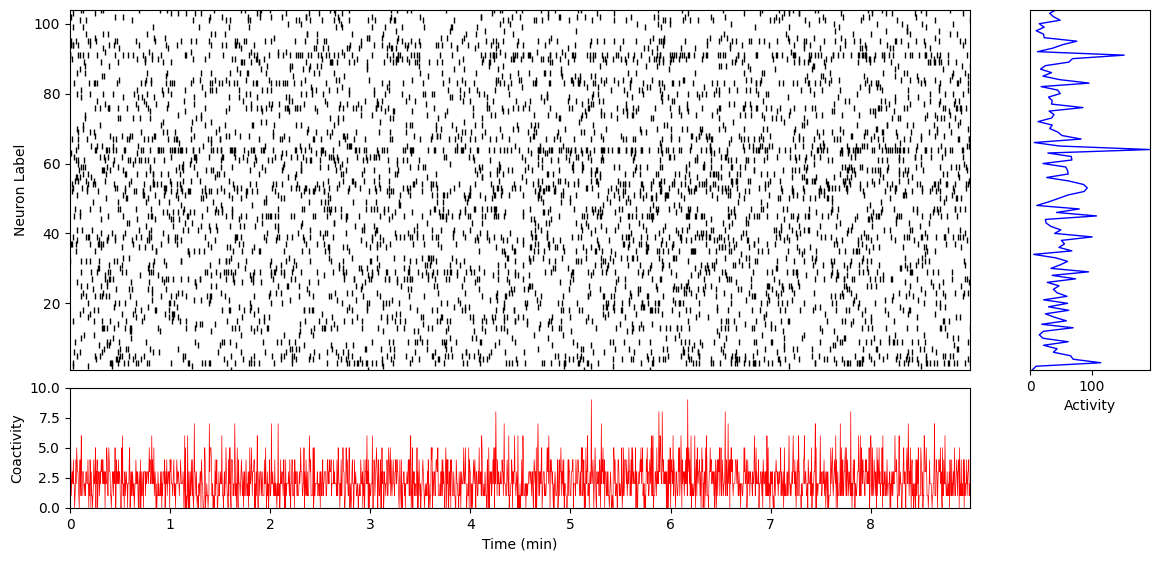

In [26]:
plot_raster(surrogate_raster(raster),pps)